#  Task 2 – Elevvo Internship  
##   Exploratory Data Analysis (EDA) on Titanic Dataset  
##  Author: Awais Manzoor  


-  Import Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#  Load the Dataset

In [6]:
# Load the Titanic dataset
df = pd.read_csv('c:/Users/hp/Downloads/Titanic-Dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 # Understand the Dataset

In [7]:
# Shape of the dataset
df.shape

(891, 12)

In [8]:
# Column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Summary statistics 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Missing Values

In [10]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:

df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)


# Converting Data Types 

In [12]:
# Convert 'Survived' to categorical
df['Survived'] = df['Survived'].astype('category')

# Convert Pclass to categorical
df['Pclass'] = df['Pclass'].astype('category')

# Summary Statistics 

In [13]:
# Make sure 'Survived' is numeric
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')


print(df.groupby('Sex')['Survived'].mean())


print(df.groupby('Pclass')['Survived'].mean())

# Combined survival by Pclass and Sex
print(df.pivot_table(index='Pclass', columns='Sex', values='Survived'))


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


C:\Users\hp\AppData\Local\Temp\ipykernel_6640\2210955720.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())
C:\Users\hp\AppData\Local\Temp\ipykernel_6640\2210955720.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df.pivot_table(index='Pclass', columns='Sex', values='Survived'))


#  Data Visualizations

# Bar Plot
-  Survival by Gender

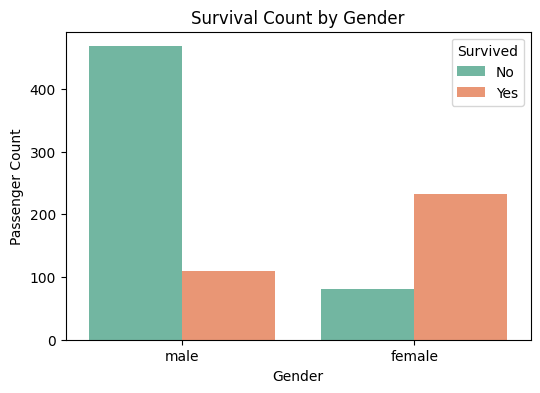

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


# Survival by Passenger Class

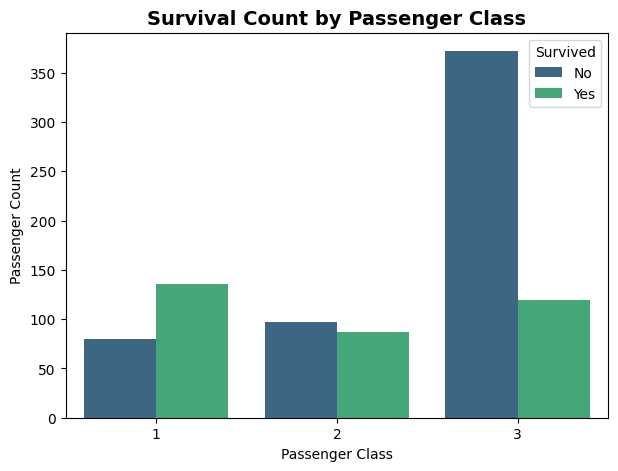

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="viridis")
plt.title("Survival Count by Passenger Class", fontsize=14, weight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()



# Age Distribution by Survival

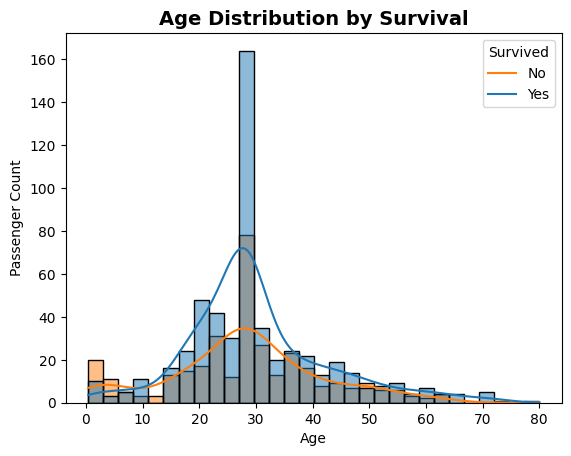

In [19]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival", fontsize=14, weight="bold")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


# Heatmap of Correlation

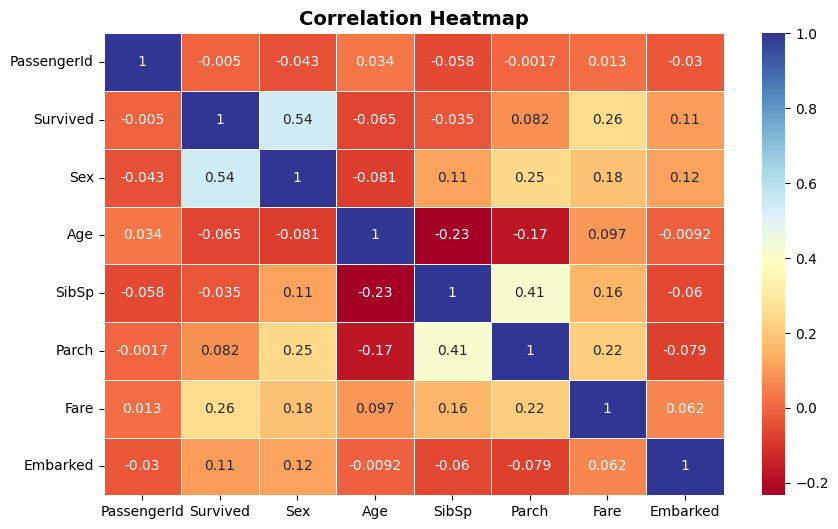

In [ ]:

df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Compute correlation matrix
corr = df_encoded.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='RdYlBu',   
    linewidths=0.5   
)
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()



#  Insights from Correlation Heatmap
## 1. Sex and Survival

- Correlation: 0.54 (strong positive)

- Encoding: male = 0, female = 1

- Insight: Women were much more likely to survive.

- Reason: This reflects the “women and children first” evacuation policy.

## 2. Fare and Survival

- Correlation: 0.26 (moderate positive)

- Insight: Passengers who paid higher fares (first-class tickets) had better survival chances.

- Reason: They likely had better cabin access and priority in evacuation.

## 3. Family Members (Parch & SibSp)

- Parch (Parents/Children): 0.082 → weak positive

- SibSp (Siblings/Spouses): -0.035 → weak negative

- Insight:

- Having a small family on board slightly increased survival.

- Large families may have struggled to escape together, reducing survival chances.

## 4. Embarked and Survival

- Correlation: 0.11 (very weak)

- Insight: Passengers from some ports had a slightly higher chance of survival, but the effect is minimal.

## 5. Age and Survival

- Correlation: -0.065 (weak negative)

- Insight: Younger passengers were a little more likely to survive.

- Reason: Children were given higher priority during rescue.
